# Photo of a Painting with Frame & Background

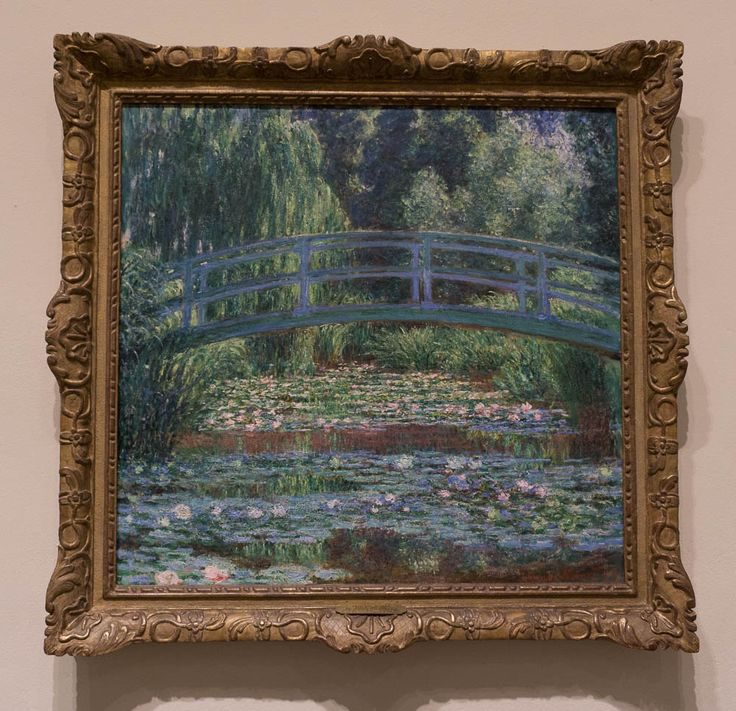

In [21]:
from PIL import Image

Image.open('c:/data/impressionism.jpg')

<br>

# Detect Painting from the Photo


0: 640x640 1 painting, 604.6ms
Speed: 3.0ms preprocess, 604.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


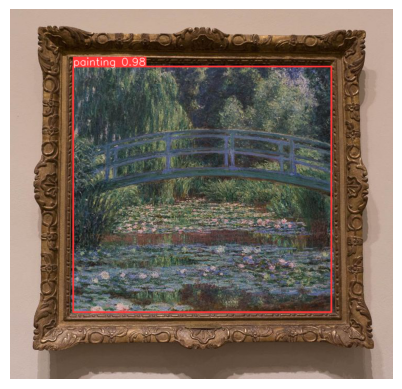

In [22]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

yolo_model = YOLO("C:/streamlit_files/best_m.pt")
uploaded_image = Image.open('c:/data/impressionism.jpg')

result = yolo_model.predict(uploaded_image)
result_plot = result[0].plot()[:, :, ::-1]

plt.imshow(result_plot)
plt.axis('off')  # to hide axis values
plt.show()

<br>

# Crop the Detected Painting from the Photo

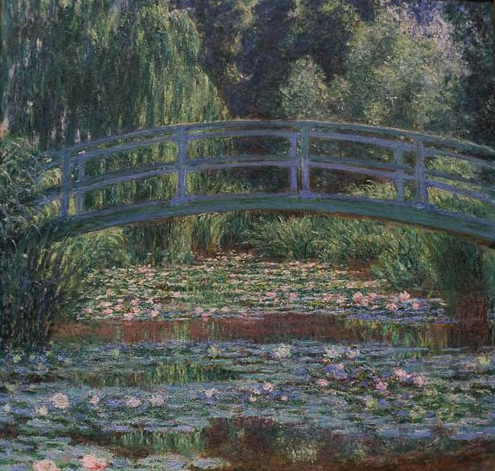

In [23]:
result_2 = result[0] 
box = result_2.boxes[0]                
cords = box.xyxy[0].tolist()
cords = [round(x) for x in cords]
area = tuple(cords)

cropped_img = uploaded_image.crop(area)

cropped_img

<br>

# Classify the Style of the Cropped Painting Image

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.resnet_rs import preprocess_input
import tensorflow as tf
import numpy as np

# Load the model withouth Data Augmentation 
model = load_model('C:/seven/model_resnetrs50_lion_dense10240_noda.h5')

# Load and preprocess the cropped image
img = cropped_img
x = img_to_array(img)
x = tf.image.resize(x, [224, 224])  # Resize the image
x = np.array([x])  # Create a batch dimension
x = preprocess_input(x)  # Preprocess the image

# Make predictions using the loaded model
predict = model.predict(x)

# Create a dictionary of class indices and their corresponding labels
class_indices = {0: 'abstract_expressionism', 1: 'baroque', 2: 'cubism', 3: 'impressionism', 4: 'native_art_primitivism', 5: 'rococo', 6: 'surrealism'}

# Get the indices of the top 3 predictions with the highest probabilities
top_3_indices = np.argsort(predict[0])[-3:][::-1]

# Print class labels and corresponding probabilities for the top 3 predictions
for index in top_3_indices:
    class_label = class_indices[index]
    probability = predict[0][index] * 100
    print(f"{class_label} ({probability:.2f}%)")

1/1 [==============================] - 1s 870ms/step
impressionism (99.53%)
rococo (0.39%)
native_art_primitivism (0.04%)
